In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
from RateTraining import *

<>:24: SyntaxWarning: invalid escape sequence '\o'
<>:24: SyntaxWarning: invalid escape sequence '\o'
C:\Users\lab\AppData\Local\Temp\ipykernel_7920\2489711867.py:24: SyntaxWarning: invalid escape sequence '\o'
  labels = ['$\omega (t)$', '$f_{in}$', '$f_{hint}$', '$f_{out}$']


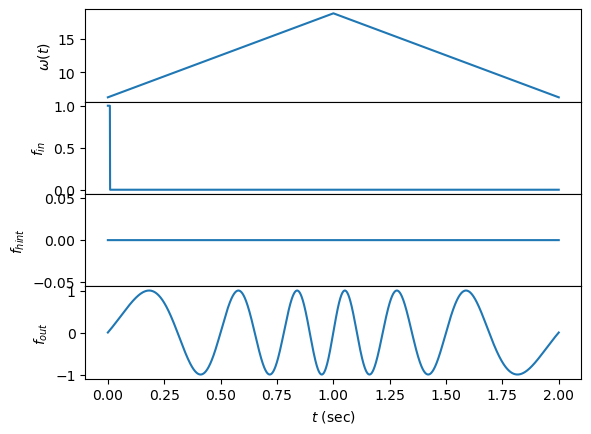

In [3]:
def inps_and_targs(dt, plot=False):
    t = np.linspace(0, 2, int(1./dt))
    
    omega = np.zeros(t.shape)
    omega[:int(t.shape[0]/2)] = np.linspace(2*np.pi, 6*np.pi, int(t.shape[0]/2))
    omega[int(t.shape[0]/2):] = np.flipud(omega[:int(t.shape[0]/2)]) # increasing decreasing (frequency of sin in fout)
    
    fout = np.zeros(t.shape)
    fout[:int(t.shape[0]/2)] = np.sin(omega[:int(t.shape[0]/2)] * t[:int(t.shape[0]/2)])
    fout[int(t.shape[0]/2):] = -np.flipud(fout[:int(t.shape[0]/2)])

    fhint = np.zeros(t.shape)

    fin = np.zeros(t.shape)
    fin[:10] = np.ones(10)

    fin = np.reshape(fin, (1, fin.size)).T
    fout = np.reshape(fout, (1, fout.size)).T
    fhint = np.reshape(fhint, (1, fhint.size)).T

    if plot:
        fig, axs = plt.subplots(4, 1, sharex=True)
        plt.subplots_adjust(hspace=0)
        labels = ['$\omega (t)$', '$f_{in}$', '$f_{hint}$', '$f_{out}$']
        for ax, y, label in zip(axs, [omega, fin, fhint, fout], labels):
            ax.plot(t, y)
            ax.set_ylabel(label)
        axs[-1].set_xlabel('$t$ (sec)')

    return (fin, fout, fhint)

dt = 0.0005 # 1/dt total timesteps
fin, fout, _ = inps_and_targs(dt, plot=True)

In [4]:
np.shape(fout)

(2000, 1)

In [5]:
npar, tpar, trpar, cpar, rpar = create_default_params_rate()
tpar['dt'] = 1
tpar['total_time'] = 2000
rpar['run_time'] = 2000
trpar['training_loops'] = 200

In [6]:
trpar

{'lam': 1, 'training_loops': 20, 'train_every': 2, 'nloop': 200}

In [12]:
uin = sp.stats.uniform.rvs(size = npar['net_size']) * 2 - 1
uout = sp.stats.uniform.rvs(size = npar['net_size']) * 2 - 1

In [13]:
ufin = np.transpose(np.multiply(fin, uin))
ufout = np.transpose(np.multiply(fout, uout))

### built in fullFORCE

In [14]:
net = RateTraining(npar, tpar, trpar, cpar, rpar)

In [15]:
xt, Hxt, errs, dws, rel_errs, aux_targs = net.fullFORCE(ufin, ufout)

Stabilizing networks
20 total trainings
training: 0


: 

Text(0.5, 1.0, 'Conn error magnitude')

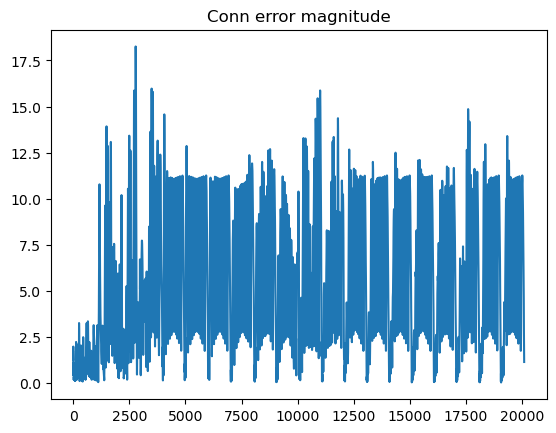

In [ ]:
plt.plot(errs)
np.shape(errs)
plt.title('Conn error magnitude')

Text(0.5, 1.0, 'Relative errors')

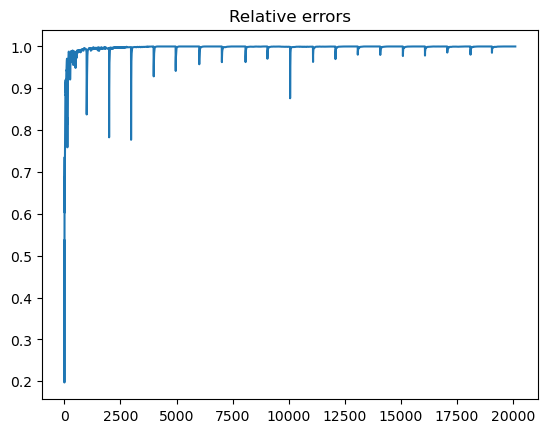

In [14]:
plt.plot(rel_errs)
plt.title('Relative errors')

Text(0.5, 1.0, 'Sample task-generating internal behavior')

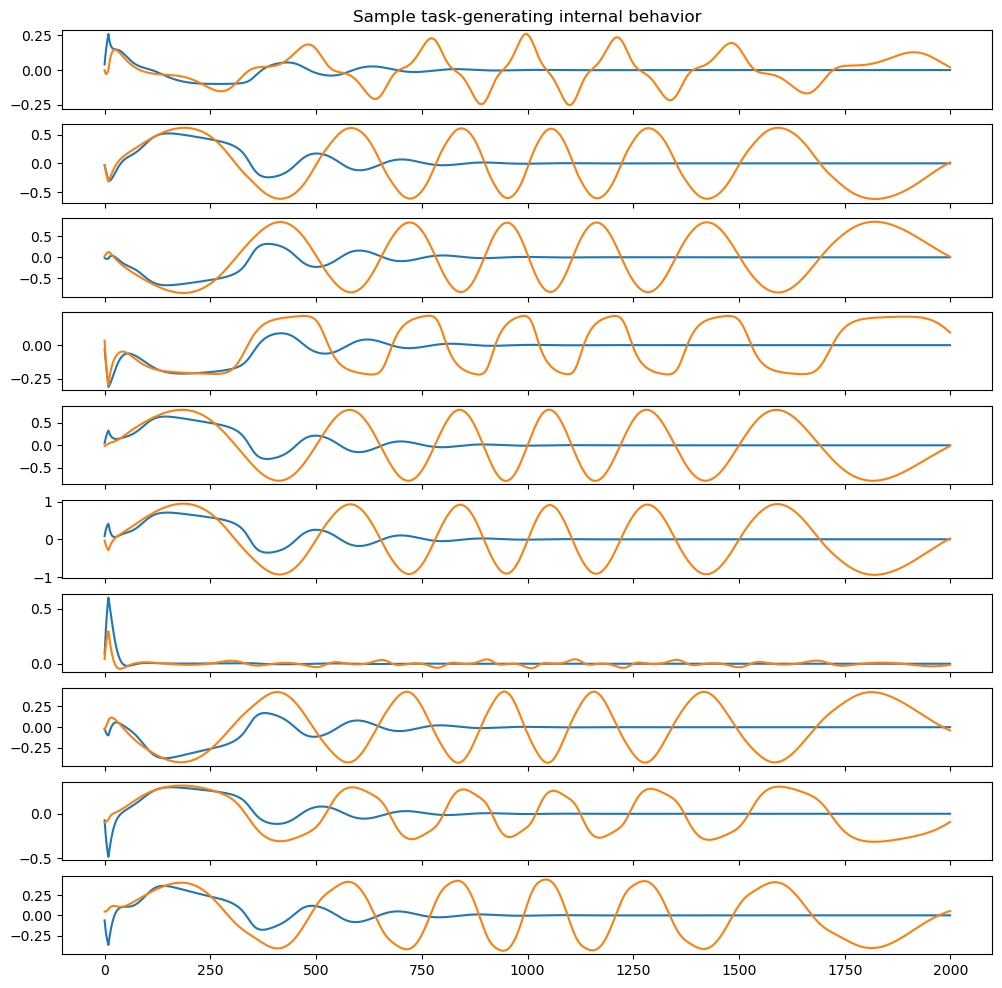

In [16]:
n_plot = 10
nloop = trpar['training_loops']
timesteps = int(tpar['total_time']/tpar['dt'])

fig, axs = plt.subplots(n_plot, 1, figsize = (12, 12), sharex = True)
for i in range(n_plot):
    # axs[i].plot(Hxt[i, 0:timesteps])
    # axs[i].plot(aux_targs[i, 0:timesteps])
    axs[i].plot(Hxt[i, (nloop - 1)*timesteps:nloop*timesteps])
    axs[i].plot(aux_targs[i, (nloop - 1)*timesteps:nloop*timesteps])

axs[0].set_title("Sample task-generating internal behavior")

### manual build fullFORCE

In [36]:
dnet = RateTraining(npar, tpar, trpar, cpar, rpar)

In [37]:
x1, Hx1 = dnet.run_rate(ufin + ufout)
x2, Hx2 = dnet.run_rate(ufin + ufout)
x3, Hx3 = dnet.run_rate(ufin + ufout)

Text(0.5, 1.0, 'Sample driven neuronal behavior')

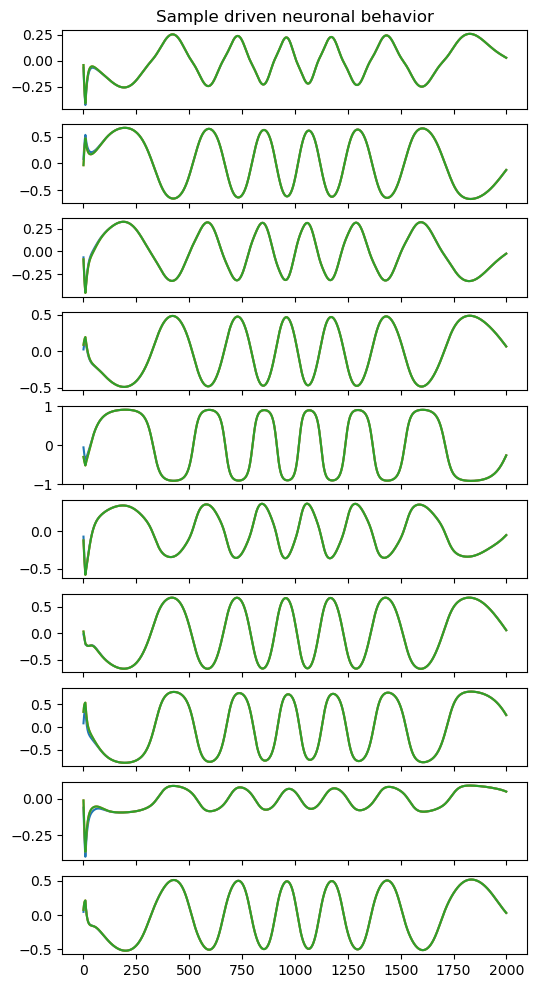

In [38]:
n_plot = 10

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(Hx1[i])
    axs[i].plot(Hx2[i])
    axs[i].plot(Hx3[i])
    #axs[i].plot(x[i])
    #axs[i].plot(ufin[i] + ufout[i])

axs[0].set_title("Sample driven neuronal behavior")

In [16]:
tnet = rate_training(npar, tpar, trpar, cpar, rpar)

In [17]:
tnet.stim_off = 3
tnet.nloop = 20

In [18]:
aux_targs = dnet.W_trained @ Hx + ufout

In [19]:
xt, Hxt, errs, dws, rel_errs = tnet.train_rate(ufin, aux_targs);
errs = np.transpose(errs)

training trial 0


Text(0.5, 1.0, 'Conn error magnitude')

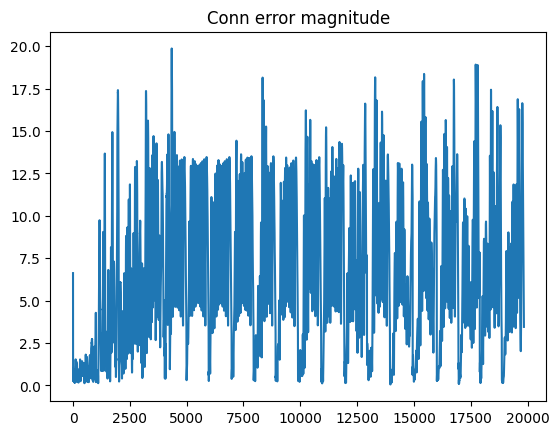

In [20]:
plt.plot(errs)
np.shape(errs)
plt.title('Conn error magnitude')

Text(0.5, 1.0, 'Relative errors')

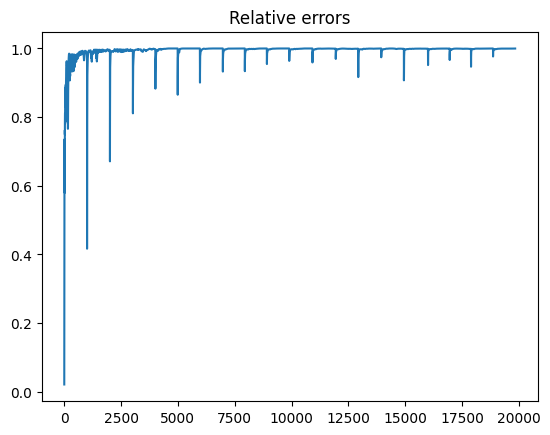

In [21]:
plt.plot(rel_errs)
plt.title('Relative errors')

In [22]:
np.linalg.norm(tnet.W_trained)

56.995122227833825

Text(0.5, 1.0, 'Sample task-generating internal behavior')

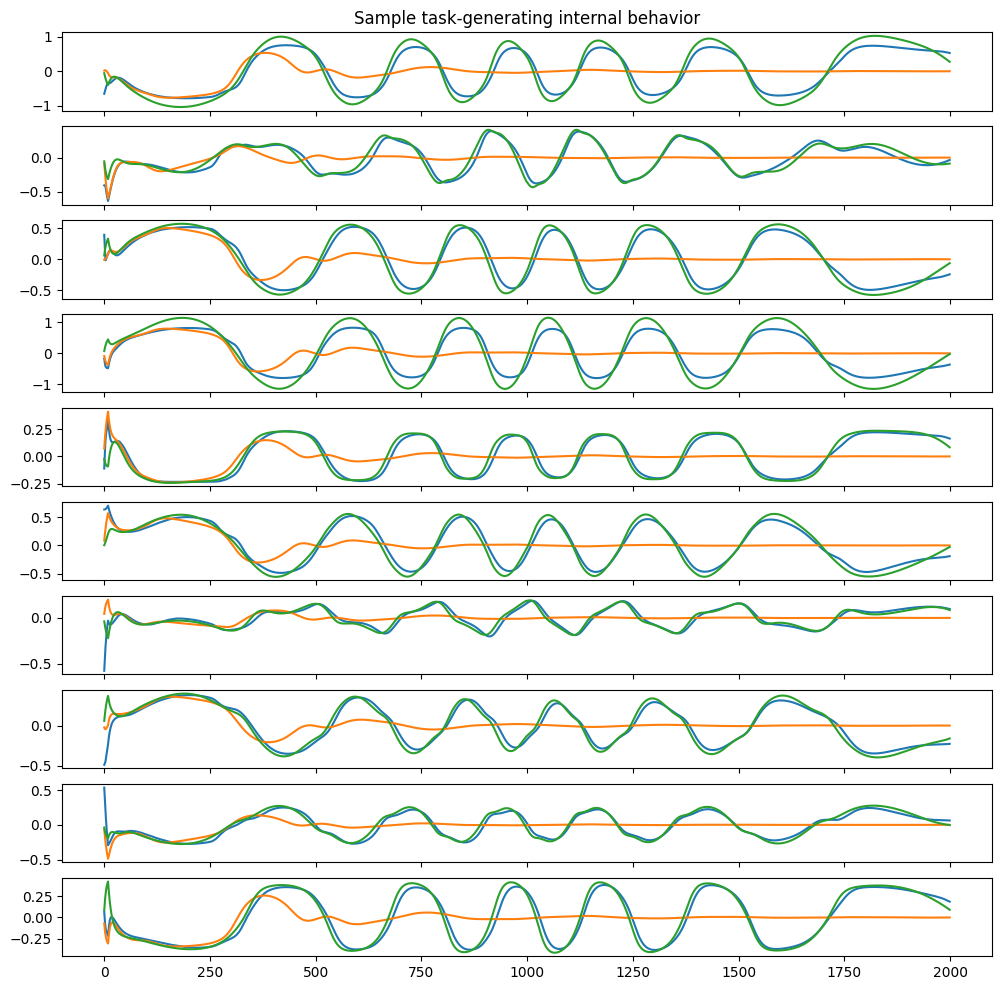

In [23]:
n_plot = 10
nloop = trpar['training_loops']
timesteps = int(tpar['total_time']/tpar['dt'])

fig, axs = plt.subplots(n_plot, 1, figsize = (12, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(Hxt[i, 0:timesteps])
    #axs[i].plot(Hxt[i])
    axs[i].plot(Hxt[i, (nloop - 1)*timesteps:nloop*timesteps])
#     axs[i].plot(x[i])
    axs[i].plot(aux_targs[i])
    #axs[i].plot(ufin[i])

axs[0].set_title("Sample task-generating internal behavior")

Text(0.5, 1.0, 'Sample run neuronal behavior')

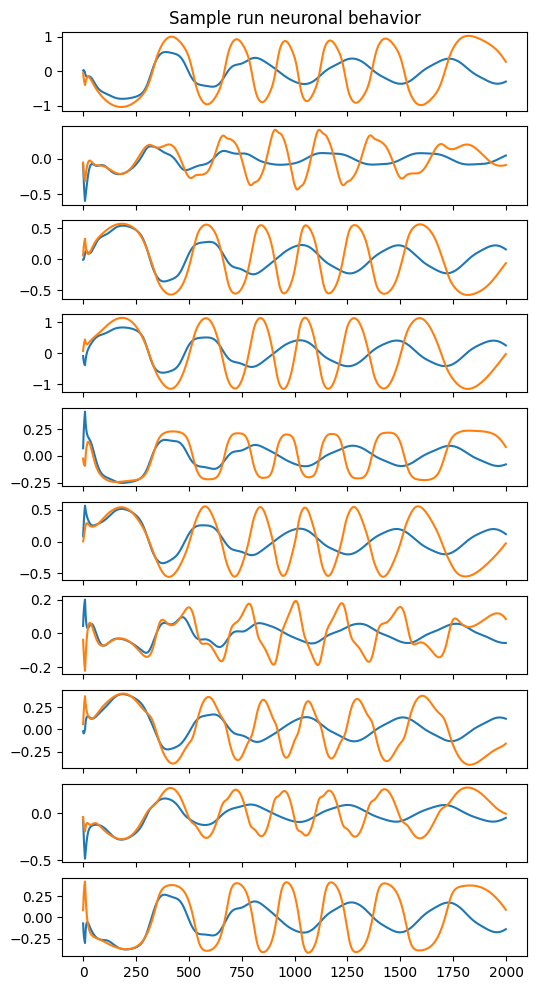

In [24]:
xr, Hxr = tnet.run_rate(ufin)

n_plot = 10

fig, axs = plt.subplots(n_plot, 1, figsize = (6, 12), sharex = True)
for i in range(n_plot):
    axs[i].plot(Hxr[i])
    #axs[i].plot(xr[i])
    axs[i].plot(aux_targs[i])

axs[0].set_title("Sample run neuronal behavior")

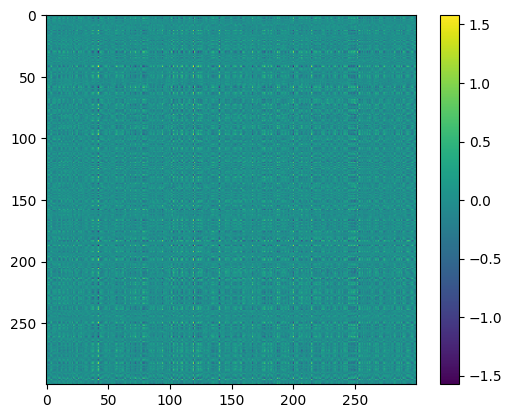

In [25]:
plt.imshow(tnet.W_trained)
plt.colorbar()

Text(0.5, 1.0, 'Norms of changes to connectivity matrix')

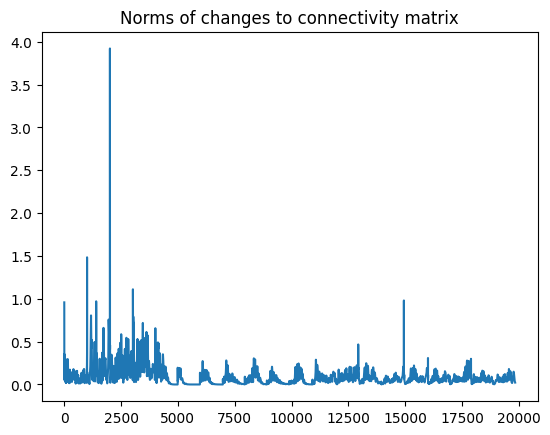

In [26]:
plt.plot(dws)
plt.title("Norms of changes to connectivity matrix")

In [22]:
P = np.array([[1, 2],[3, 4]])
hx = np.array([2, 3])

In [40]:
hxcol = np.array([[2], [3]])

In [47]:
Prt = P @ hxcol
Prt

array([[ 8],
       [18]])

In [48]:
Pr = P @ hx
Pr

array([ 8, 18])

In [52]:
np.dot(np.transpose(hxcol), Prt) + 1

array([[71]])

In [53]:
np.dot(hx, Pr) + 1

71

In [54]:
np.transpose(Prt)

array([[ 8, 18]])

In [55]:
np.dot(P, hx)

array([ 8, 18])

In [56]:
np.dot(hx, P)

array([11, 16])